## Project Description
In this Instacart EDA project, I will analyze a dataset from Instacart, a popular grocery delivery platform. The dataset, based on the 2017 Kaggle competition, has been modified for the project. My mission is to clean and preprocess the data, address missing and duplicate values, and provide valuable insights into Instacart customers' shopping habits.

The dataset modifications aim to enhance processing speed while maintaining the original data's distributions. After tackling data preprocessing, I will explore various aspects, answering questions that delve into customer behavior. Each question will be followed by concise explanations of my findings, creating a comprehensive report on Instacart shopping trends.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
orders = pd.read_csv("/datasets/instacart_orders.csv", sep=';')
products = pd.read_csv("/datasets/products.csv", sep= ';')
aisles = pd.read_csv("/datasets/aisles.csv", sep=';')
departments = pd.read_csv("/datasets/departments.csv", sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [4]:
# Check for duplicated orders
display(orders.duplicated().sum())

15

In [5]:
# Check for all orders placed Wednesday at 2:00 AM
wed_order= orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
wed_order

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [6]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [7]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [8]:
# Double check for duplicate order IDs only
orders.duplicated(subset=['order_id']).sum()

0

There were 15 duplicated orders that were found in the dataframe. Orders placed on Wednesday at 2am were checked then all duplicates were then removed.

### `products` data frame

In [9]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [10]:
# Check for just duplicate product IDs
products.duplicated(subset=['product_id']).sum()

0

In [11]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name_lowered'] = products['product_name'].str.lower()
products[products.duplicated(subset=['product_name_lowered'], keep=False)]

,product_id,product_name,aisle_id,department_id,product_name_lowered
37,38,NaN,100,21,NaN
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,fresh scent dishwasher detergent with dawn
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


In [12]:
# Check for duplicate product names that aren't missing
duplicate_products = products[products.duplicated(subset=['product_name_lowered']) & ~products['product_name_lowered'].isnull()]
duplicate_products.sample(17)

,product_id,product_name,aisle_id,department_id,product_name_lowered
48824,48825,Bag of Organic Lemons,24,4,bag of organic lemons
2058,2059,Biotin 1000 Mcg,47,11,biotin 1000 mcg
49688,49689,FLUFFLY VANILLA MARSHMALLOW FROSTING,97,13,fluffly vanilla marshmallow frosting
19813,19814,Green Tea With Ginseng And Honey,94,7,green tea with ginseng and honey
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
41328,41329,Carrot And Celery Sticks,123,4,carrot and celery sticks
37418,37419,Flat Fillets Of Anchovies In Pure Olive Oil,95,15,flat fillets of anchovies in pure olive oil
38055,38056,Top The Tater Chive & Onion Sour Cream,129,1,top the tater chive & onion sour cream
31292,31293,Chicken With Rice Soup,13,20,chicken with rice soup
40877,40878,Macaroni And Cheese,4,9,macaroni and cheese


There were 104 duplicated products that were found whose name were not missing. However there could be products that have misssing 

### `departments` data frame

In [13]:
departments.duplicated().sum()

0

In [14]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [15]:
duplicate_department_id = departments[departments.duplicated(subset=['department_id'])]
duplicate_department_id

,department_id,department


After checking sum of all duplicates and checking department_id. There were no duplicates thast were found in the departments dataframe specifically the department_id column.

### `aisles` data frame

In [16]:
aisles.duplicated().sum()

0

In [17]:
aisles.sample(5)

,aisle_id,aisle
54,55,shave needs
111,112,bread
52,53,cream
105,106,hot dogs bacon sausage
90,91,soy lactosefree


In [18]:
duplicate_aisle_id = aisles[aisles.duplicated(subset=['aisle_id'])]
duplicate_aisle_id

,aisle_id,aisle


There are no duplicates that were found in the dataframe. All aisle_id occur once.

### `order_products` data frame

In [19]:
# Check for fullly duplicate rows
display(order_products[order_products.duplicated(keep=False)])

,order_id,product_id,add_to_cart_order,reordered


In [20]:
# Double check for any other tricky duplicates
order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]

,order_id,product_id,add_to_cart_order,reordered


There were no duplicated rows or other tricky duplicates that were found in the order_products dataframe.

## Find and remove missing values


### `products` data frame

In [21]:
products

,product_id,product_name,aisle_id,department_id,product_name_lowered
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


In [22]:
products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            49694 non-null  int64 
 1   product_name          48436 non-null  object
 2   aisle_id              49694 non-null  int64 
 3   department_id         49694 non-null  int64 
 4   product_name_lowered  48436 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


In [23]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_aisle_100 = products[(products['product_name'].isnull()) & (products['aisle_id'] == 100)]
missing_product_aisle_100

,product_id,product_name,aisle_id,department_id,product_name_lowered
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Upon reviewing the dataset we see that all the missing product names associated with aisle 100 is 1258. The total number of rows is 49694 and there are only 48436 non null product names. If we calculate (Total number of rows - All non-null product name rows) we get 49,694-48436 = 1258. Which means all the missing names are from aisle 100.

In [24]:
# Are all of the missing product names associated with department ID 21?
missing_product_department_21 = products[(products['product_name'].isnull()) & (products['department_id'] == 21)]
missing_product_department_21

,product_id,product_name,aisle_id,department_id,product_name_lowered
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Upon checking all the missing values associated with department 100 comes to a total of 1258 which is equivalent to the total missing product names, therefor all the missing product names are from department 100.

In [25]:
# What is this ailse and department?
aisle_100 = aisles[aisles['aisle_id'] == 100]['aisle'].iloc[0]
department_21 = departments[departments['department_id'] == 21]['department'].iloc[0]
aisles.iloc[97:102]

,aisle_id,aisle
97,98,juice nectars
98,99,canned fruit applesauce
99,100,missing
100,101,air fresheners candles
101,102,baby bath body care


In [26]:
departments.iloc[18:]

,department_id,department
18,19,snacks
19,20,deli
20,21,missing


In [27]:
print(f"Aisle: {aisle_100}")
print(f"Department: {department_21}")

Aisle: missing
Department: missing


In [28]:
# Fill missing product names with 'Unknown'
products['product_name_lowered'] = products['product_name_lowered'].fillna('Unknown')
name_check = products[products['aisle_id']==100]
name_check

,product_id,product_name,aisle_id,department_id,product_name_lowered
37,38,NaN,100,21,Unknown
71,72,NaN,100,21,Unknown
109,110,NaN,100,21,Unknown
296,297,NaN,100,21,Unknown
416,417,NaN,100,21,Unknown
...,...,...,...,...,...
49552,49553,NaN,100,21,Unknown
49574,49575,NaN,100,21,Unknown
49640,49641,NaN,100,21,Unknown
49663,49664,NaN,100,21,Unknown


All the null values have been replaced with a unique value which is 'Unknown'

### `orders` data frame

In [29]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [30]:
# Are there any missing values where it's not a customer's first order?
missing_days_non_first_order = orders[orders['order_number'] > 1]['days_since_prior_order'].isnull().sum()
missing_days_non_first_order

0

There are no missing values where it's not the customer's first order.

### `order_products` data frame

In [31]:
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [32]:
# What are the min and max values in this column?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(f"The minimum value is {min_value}")
print(f"The maximum value is {max_value}")

The minimum value is 1.0
The maximum value is 64.0


In [33]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

    #Create a list of unique order_id values with missing add_to_cart_order
orders_with_missing_add_to_cart = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
display(orders_with_missing_add_to_cart)

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [34]:
    #Filter order_products dataframe based on the list of unique order_id values
filtered_order_products = order_products[order_products['order_id'].isin(orders_with_missing_add_to_cart)]
display(filtered_order_products)

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [35]:
    #Group by order_id and count the number of rows for each order_id
missing_values_count_per_order = filtered_order_products.groupby('order_id').size().reset_index(name='missing_values_count')

    #Display the result
display(missing_values_count_per_order)


,order_id,missing_values_count
0,9310,65
1,61355,127
2,102236,95
3,129627,69
4,165801,70
...,...,...
65,2999801,70
66,3125735,86
67,3308010,115
68,3347453,71


In [36]:
# Do all orders with missing values have more than 64 products?

    #Check if any order has more than 64 products
all_orders_more_than_64_products = (missing_values_count_per_order['missing_values_count'] > 64).all()
display(all_orders_more_than_64_products)

True

In [37]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


After assessing the data, all orders with missing values have more than 64 products. This can be also confirmed by the fact that the max value was 64. Rows in the 'order_products' dataframe were identified where 'add_to_cart_order' values are missing (NaN). The missing values were filled with the integer 999 and the 'add_to_cart_order' column was connverted to an integer type.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [38]:
unique_order_hour_of_day = sorted(orders['order_hour_of_day'].unique())
print("Sorted unique 'order_hour_of_day' values:", unique_order_hour_of_day)

Sorted unique 'order_hour_of_day' values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [39]:
unique_order_dow = sorted(orders['order_dow'].unique())
print("Sorted unique 'order_dow' values:", unique_order_dow)

Sorted unique 'order_dow' values: [0, 1, 2, 3, 4, 5, 6]


After checking the unqiue values and sorting the data for both 'order_hour_of_day' and 'order_dow' it is found that the values do match the number of hours in a day and days of the week starting from 0 instead of 1. There were 24 values for hours, and 7 values for days.

### [A2] What time of day do people shop for groceries?

In [40]:
orders.sample(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
333078,2192012,117719,30,5,16,17.0
424514,2628629,164884,2,6,14,17.0


In [41]:
#number of time each hour occurs by calling value count and sorting the index
hour_count = orders['order_hour_of_day'].value_counts().sort_index()
hour_count

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

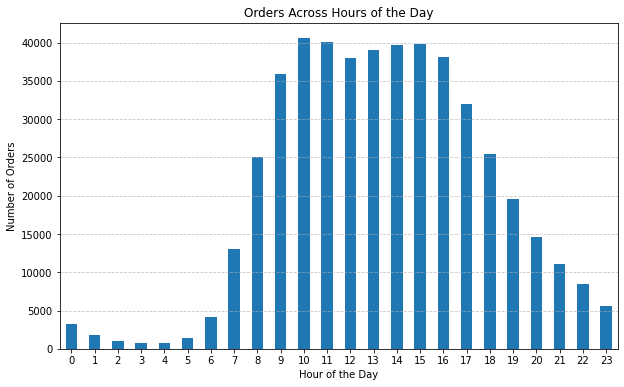

In [42]:
#Plotting the result
hour_count.plot(kind='bar',title='Orders Across Hours of the Day', figsize= [10,6],xlabel="Hour of the Day", ylabel="Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

From the graph above, people shop for groceries all throught the day. However the lowest activity is between the hours of 0000 and 0600. The highest activity ranges from 0900 to 1600, with 1000 having the Highest activity of all the hours.

### [A3] What day of the week do people shop for groceries?

In [43]:
#number of time each day occurs by calling value count and sorting the index
day_count = orders['order_dow'].value_counts().sort_index()
day_count

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

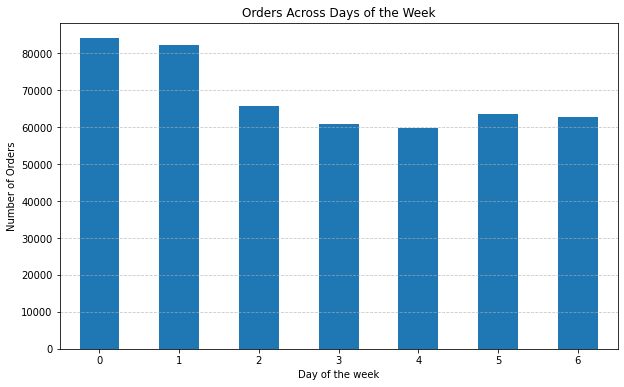

In [44]:
#Plotting the result
day_count.plot(kind='bar',title='Orders Across Days of the Week', figsize= [10,6],xlabel="Day of the week", ylabel="Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

From the graph, people shop for groceries right throughout the week. The highest activity day 0 and lowest day 4. Day 0 was not specified, however:
Assuming Sunday is 0 since most people are home on the weekends it had the highest activity, and Thursday which is the middle of the week having the lowest activity.

### [A4] How long do people wait until placing another order?

In [45]:
#count for days since last order by calling value count and sorting the index
days_since_prior_order_count = orders['days_since_prior_order'].value_counts().sort_index()
days_since_prior_order_count

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: days_since_prior_order, dtype: int64

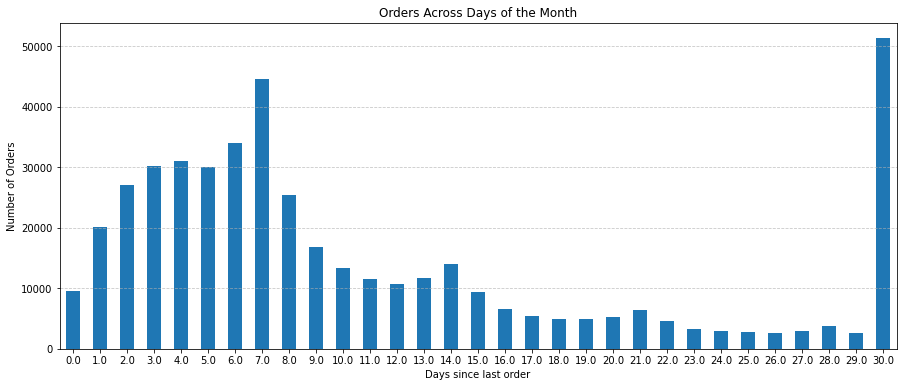

In [46]:
#Plotting the result
days_since_prior_order_count.plot(kind='bar',title='Orders Across Days of the Month', figsize= [15,6],xlabel="Days since last order", ylabel="Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

From the graph above, Most people wait 30 days before placing another order. While in second place we see people wait 7 days. This could mean that most people do monthly shopping and weekly shopping.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [47]:
#Finding the data for order hour of day for wednesday and saturday
Wednesday_data = orders[orders['order_dow'] == 3]['order_hour_of_day']
Saturday_data = orders[orders['order_dow'] == 6]['order_hour_of_day']

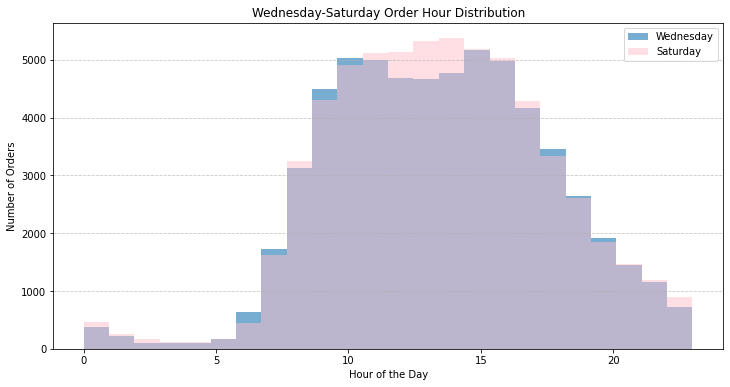

In [48]:
#Plotting the result
Wednesday_data.plot(kind='hist',title='Wednesday-Saturday Order Hour Distribution', bins=24, figsize= [12,6],alpha=0.6)
Saturday_data.plot(kind='hist', bins=24,alpha=0.5, color='pink')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.legend(["Wednesday", "Saturday"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the information on the graph. There is not much difference between Saturday and Wednesday order hours of day. The main difference howver is there is more activity on Saturdays during the midday to afternoon hours compared to Wednesdays.

### [B2] What's the distribution for the number of orders per customer?

In [49]:
# count for each order id since it is unique to each customer
orders_per_customer = orders['user_id'].value_counts()

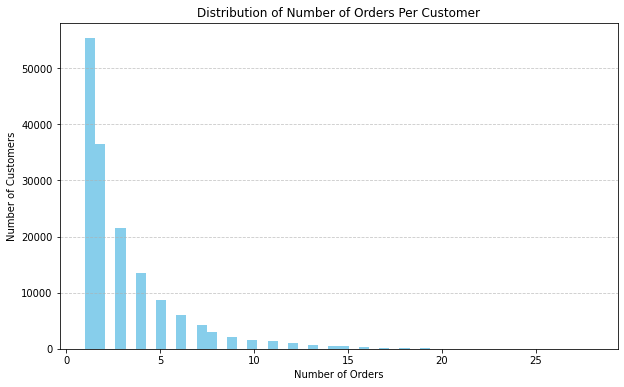

In [50]:
# Plot the distribution of the number of orders per customer
orders_per_customer.plot(kind='hist', bins=50,title='Distribution of Number of Orders Per Customer', figsize= [10,6],color='skyblue')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the data it seems that the majority of customers make 5 orders or less.

### [B3] What are the top 20 popular products (display their id and name)?

In [51]:
#display order products dataframe
order_products.sample(5)

,order_id,product_id,add_to_cart_order,reordered
3057297,277946,43086,6,1
4505025,962247,28990,16,0
2596729,237163,7969,5,0
2133224,1199406,16231,7,1
2183219,1286790,48395,23,0


In [52]:
#display products dataframe
products.sample(5, random_state=85)

,product_id,product_name,aisle_id,department_id,product_name_lowered
48711,48712,Apricot Probiotic Cleansing Milk,109,11,apricot probiotic cleansing milk
24124,24125,Olive Bread,112,3,olive bread
13153,13154,NaN,100,21,Unknown
14069,14070,Baked Pizzeria Pretzel Snacks,107,19,baked pizzeria pretzel snacks
24753,24754,Garlic & Green Onion Teriyaki Sauce,66,6,garlic & green onion teriyaki sauce


In [53]:
#Merge the dataframes together
merged_df = order_products.merge(products[['product_id', 'product_name_lowered']], on='product_id', how='left')
merged_df.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name_lowered
0,2141543,11440,17,0,chicken breast tenders breaded
1,567889,1560,1,1,bag of ice
2,2261212,26683,1,1,cafe latte pure lightly sweetened iced coffee ...
3,491251,8670,35,1,diced tomatoes
4,2571142,1940,5,1,organic 2% reduced fat milk


In [54]:
# Get the top 20 popular products
top_20_products = merged_df['product_name_lowered'].value_counts().head(20)
# Display the product IDs and names
top_20_products_df = pd.DataFrame({'product_id': top_20_products.index, 'product_name_lowered': top_20_products.values})
display(top_20_products_df)

,product_id,product_name_lowered
0,banana,66050
1,bag of organic bananas,53297
2,organic strawberries,37039
3,organic baby spinach,33971
4,organic hass avocado,29773
5,organic avocado,24689
6,large lemon,21495
7,strawberries,20018
8,limes,19690
9,organic whole milk,19600


Based on the information the Top three products are: Banana, Bag of Organic Bananas and Organic Strawberries.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [55]:
order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1


In [56]:
#Calculate the number of items per order
items_per_order = order_products.groupby('order_id')['product_id'].count()
display(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

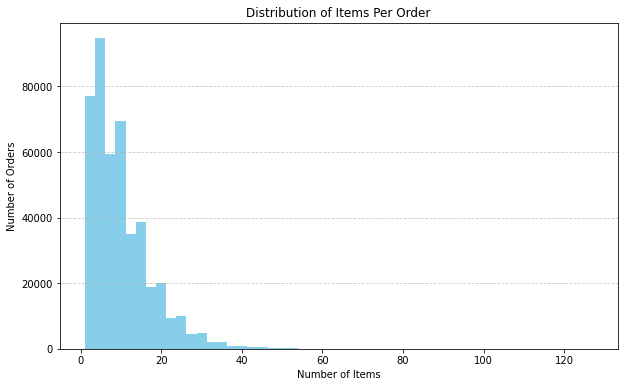

In [57]:
# Plot the distribution of items per order
items_per_order.plot(title='Distribution of Items Per Order',kind='hist', bins=50, figsize=[10, 6], color='skyblue')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


From the data above, it is safe to conclude that most orders have 20 or less items

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [59]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [65]:
# Filter products that were reordered
reordered_products = order_products[order_products['reordered'] == 1]

# Apply count method, sort data, and choose any column to represent the results
top_reordered_items = reordered_products.groupby('product_id').count().reset_index().sort_values(by='order_id', ascending=False).head(20)

# Merge with the products DataFrame to get product names
top_reordered_items_names = pd.merge(top_reordered_items, products[['product_id', 'product_name_lowered']], on='product_id', how='left')

# Display the top reordered items
display(top_reordered_items_names)

,product_id,order_id,add_to_cart_order,reordered,product_name_lowered
0,24852,55763,55763,55763,banana
1,13176,44450,44450,44450,bag of organic bananas
2,21137,28639,28639,28639,organic strawberries
3,21903,26233,26233,26233,organic baby spinach
4,47209,23629,23629,23629,organic hass avocado
5,47766,18743,18743,18743,organic avocado
6,27845,16251,16251,16251,organic whole milk
7,47626,15044,15044,15044,large lemon
8,27966,14748,14748,14748,organic raspberries
9,16797,13945,13945,13945,strawberries


The data above displays the top 20 products that are reordered. Of the 20 products, the top three reordered products are: banana, bag of organic bananas, and organic strawberries.

In [159]:
# Get the top 20 items with the highest reorder proportions
top_20_reordered_items = reorder_proportions.sort_values(ascending=False).head(20)

# Merge with products to get product names
top_20_reordered_items = pd.merge(top_20_reordered_items, products[['product_id', 'product_name']], on='product_id', how='left')

# Display the result
print(top_20_reordered_items[['product_id', 'product_name']])


    product_id                                       product_name
0        14721                            Bone Strength Take Care
1        20949                           Vanilla Sandwich Cookies
2         6723                                   Palmiers- Petite
3         6732                  Naturally Sparkling Mineral Water
4        45088  California Dill Pollen & Garlic Goat Cheese & ...
5        45078                                       Pomegranatea
6        21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans
7        21005                        Peanut Butter Pie Ice Cream
8        35192                         Chocolate Soy Milk Singles
9        35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...
10        6810                        Raspberry Goji Paleo Prints
11       45040                                 Head Lock Mega Gel
12       45035                               Coffee Flavor Yogurt
13       27373                                     Meat Loaf Meal
14       3

The top three most sold Items are: Bone Strength Take Care, Vanilla Sandwich Cookies, and Palmiers- Petite.

### [C3] For each product, what proportion of its orders are reorders?

In [160]:
order_products.sample(5)

,order_id,product_id,add_to_cart_order,reordered
3695555,738615,955,9,0
3889275,142464,37594,2,1
1663444,1019039,9772,7,0
1643385,2483573,40353,6,0
3861603,1696168,21903,2,0


In [161]:
# Calculate the proportion of reorder for each product
reorder_proportions_per_product = order_products.groupby('product_id')['reordered'].mean()
# Merge with products to get product names
reorder_proportions_per_product = pd.merge(reorder_proportions_per_product, products[['product_id', 'product_name']], on='product_id', how='left')
reorder_proportions_per_product.head()

,product_id,reordered,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange


In [162]:
# Rename the columns
reorder_proportions_per_product.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)
# Display the result
display(reorder_proportions_per_product[['product_id', 'product_name', 'reorder_proportion']])

,product_id,product_name,reorder_proportion
0,1,Chocolate Sandwich Cookies,0.564286
1,2,All-Seasons Salt,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,0.738095
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,0.510204
4,7,Pure Coconut Water With Orange,0.500000
...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
45571,49693,SPRING WATER BODY WASH,0.440000


### [C4] For each customer, what proportion of their products ordered are reorders?

In [163]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [164]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [165]:
# Merge orders with order_products and products
merged_data = pd.merge(orders, order_products, on='order_id', how='inner')
merged_data = pd.merge(merged_data, products[['product_id', 'product_name']], on='product_id', how='left')

# Calculate the proportion of reordered products for each customer
reorder_proportions_per_customer = merged_data.groupby('user_id')['reordered'].mean().reset_index()
reorder_proportions_per_customer.rename(columns={'reordered': 'reorder_proportion'}, inplace=True)

# Display the result
display(reorder_proportions_per_customer[['user_id', 'reorder_proportion']])


,user_id,reorder_proportion
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


From the data: 0 means none of the products were reordered while 1 indicates all of the products were reordered. From the result, you can observe that different customers have varying levels of reorder behavior. Some of the customers have a higher proportion of reordered products, while others have lower or no reorders at all.

### [C5] What are the top 20 items that people put in their carts first? 

In [166]:
#The order_products dataframe has each order and a product id associated with it
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [167]:
#The products dataframe has the name associate with each product id
products.head()

,product_id,product_name,aisle_id,department_id,product_name_lowered
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies
1,2,All-Seasons Salt,104,13,all-seasons salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce


In [168]:
# Merge order_products with products to get product names
merged_cart_order = pd.merge(order_products, products[['product_id', 'product_name_lowered']], on='product_id', how='left')
merged_cart_order.head()

,order_id,product_id,add_to_cart_order,reordered,product_name_lowered
0,2141543,11440,17,0,chicken breast tenders breaded
1,567889,1560,1,1,bag of ice
2,2261212,26683,1,1,cafe latte pure lightly sweetened iced coffee ...
3,491251,8670,35,1,diced tomatoes
4,2571142,1940,5,1,organic 2% reduced fat milk


In [169]:
# Filter products where 'add_to_cart_order' is equal to 1
top_items = merged_cart_order[merged_cart_order['add_to_cart_order']==1][['product_id', 'product_name_lowered']]
#Print top items
top_items = top_items.groupby(['product_id', 'product_name_lowered']).size().reset_index(name='count')
top_items = top_items.sort_values(by='count', ascending=False).head(20)
top_items

,product_id,product_name_lowered,count
13414,24852,banana,15562
7127,13176,bag of organic bananas,11026
15028,27845,organic whole milk,4363
11384,21137,organic strawberries,3946
25439,47209,organic hass avocado,3390
11786,21903,organic baby spinach,3336
25732,47766,organic avocado,3044
10622,19660,spring water,2336
9050,16797,strawberries,2308
15102,27966,organic raspberries,2024


These are the top 20 orders that people put in their carts first. Three of the Top 20 items people put in their cart first are: banana, bag of organic bananas, and organic whole milk.

## Conclusion
1. Data cleaning and exploration was done. After cleaning, duplicates handling, and addressing missing values. A distribution of shopping acros hours of the day and days of the week was done.
2. Shopping paterns of customers were looked at: customers frequency of shopping and items they reordered were looked at. 
3. The proportion of reorders for each product and customer was assessed along with the top items they placed in their carts first, shedding light on customer loyalty and preferences.

These are the insight:
1. Most orders occur between 9 AM and 5 PM during the day.
2. During the week , day 0 and day 1 have the highest activity respectively with day 4 having the lowest activity of the week.
3. Most people do monthly shopping and weekly shopping. Monthly shoppers have the highest activity followed by weekly shoppers.
4. Distribution of Number of Orders Per Customer was checked; we find that majority of customers make 10 orders or less.
5. Distribution of number of items per order was checked; we find that most orders have 20 or less items.
6. The top 20 items that are reoredered most frequently was checked, of that the top three items are: Bone Strength Take Care, Vanilla Sandwich Cookies, and Palmiers- Petite.
7. The top 20 items customer put in their cart first was checked, of that the top three are: banana, bag of organic bananas, and organic whole milk.
8. For each customer the proportion of their products ordered are reorders was checked and it was found that different customers have varying levels of reorder behavior. Some of the customers have a higher proportion of reordered products, while others have lower or no reorders at all.

In conclusion, this analysis provides valuable insights into the customer shopping habits on the Instacart platform. The project's findings serve as a foundation for future research and optimization of the shopping experience for both customers and on the platform itself.